# 680 Homework 1
Yuxuan Xia

## Problem 1

a) Fill in discount curve, zero curve, forward curve

b) Compute the PV of the bond cash flows

c) Change the forward curve by +0.5% (at each maturity one at a time) and compute the discount factors and PV, DV01, duration of the bond for each case. Which forward change has the highest DV01?

d) Compute the PV of the bond when increasing simultaneously all the forward rates by 1%,2%, and 3%

e) What is the forward price of the bond 18 months from today?

f) Compute the duration of the bond

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

def calculateDiscountedFactorCorrespondingToFowardRate(forwardRate):
    DF = []
    DF.append(1)
    for i,forward in enumerate(forwardRate):
        DF.append(DF[i]/(1+forward))
    return DF

def calculatePV(cashflow,DF):
    return np.dot(np.asarray(cashflow),np.asarray(DF))

def calculatePV2(cashflow,y):
    DF2 = [1/(1+y)**(i+1) for i in range(len(cashflow))]
    return np.dot(np.asarray(cashflow),np.asarray(DF2))

def calculateCouponAnnualYield(PV,cashflow):
    fun = lambda y: calculatePV2(cashflow,y)-PV
    x0= scipy.optimize.brentq(fun,0,1)
    return x0

def calculateDV01(PV,cashflow,dy=1e-6):
    y = calculateCouponAnnualYield(PV,cashflow)
    dP = calculatePV2(cashflow,y+dy)-PV
    return -dP/dy/10000

def calculateDuration(PV,cashflow,dy=1e-6):
    y = calculateCouponAnnualYield(PV, cashflow)
    dP = calculatePV2(cashflow, y + dy) - PV
    return -dP/PV/dy


### 1.1

In order to fill in discount curve, zero curve, forward curve, using the following relations,
$$z(t)=(\frac{1}{DF(t)})^{1/t}-1$$
$$f(t)=\frac{DF(t-1)}{DF(t)} -1$$
$$c(t) = \frac{1-DF(t)}{\Sigma_{i=1}^t DF(i)}$$

The explicit process is written in "Book1.xlsx".

Here, I just post the result saved in "Input1.xlsx". NaN denote undefined quantity.

In [2]:
df = pd.read_excel("Input1.xlsx")
print(df)

         Type  maturity  inputs  discount      zero   forward       par  \
0   Overnight         0  0.0190  1.000000       NaN  0.019000       NaN   
1        cash         1  0.0210  0.979432  0.021000  0.021000  0.021000   
2        cash         2  0.0220  0.957411  0.022000  0.023001  0.021989   
3    forwards         3  0.0220  0.936801  0.022000  0.022000  0.021993   
4    forwards         4  0.0235  0.915292  0.022375  0.023500  0.022357   
5    forwards         5  0.0230  0.894713  0.022500  0.023000  0.022480   
6       swaps         6  0.0225  0.874932  0.022518  0.022609  0.022500   
7       swaps         7  0.0240  0.846283  0.024130  0.033852  0.024000   
8       swaps         8  0.0235  0.829981  0.023567  0.019642  0.023500   
9       swaps         9  0.0240  0.806996  0.024112  0.028483  0.024000   
10      swaps        10  0.0245  0.783772  0.024663  0.029630  0.024500   

    cash flow  
0         NaN  
1         3.0  
2         3.0  
3         3.0  
4         3.0  
5  

### 1.2

Given discount factors at any point in time one can find the present value of any future cashflows:
$$PV=\Sigma_i DF(t_i)C(t_i)$$

In [3]:
cashflow = df['cash flow'][1:10]
PV = calculatePV(df['cash flow'][1:10],df['discount'][1:10])
print("PV:",PV)

PV: 104.825104221


### 1.3



In [4]:
forward = df.forward[1:10]
PVs_c = []
PVs_c.append(PV)
DV01s_c = []
Durations_c =[]
for i in range(1,10):
    newForward = forward.copy()
    newForward[i]=forward[i]+0.005
    newDiscount=calculateDiscountedFactorCorrespondingToFowardRate(newForward)
    newPV = calculatePV(cashflow,newDiscount[1:])
    PVs_c.append(newPV)
    newDV01 = calculateDV01(newPV, cashflow)
    newDuration = calculateDuration(newPV, cashflow)
    DV01s_c.append(newDV01)
    Durations_c.append(newDuration)
# save the above data
df3 = pd.DataFrame()
df3['maturity'] = [i for i in range(1,10)]
df3['PV'] = PVs_c[1:]
df3['DV01'] = DV01s_c
df3['Duration'] = Durations_c
print(df3)
df3.to_csv("Output2.csv",mode='w')

   maturity          PV      DV01  Duration
0         1  104.314261  0.081897  7.850982
1         2  104.329546  0.081911  7.851207
2         3  104.343047  0.081924  7.851405
3         4  104.357413  0.081937  7.851616
4         5  104.370541  0.081950  7.851809
5         6  104.383428  0.081962  7.851998
6         7  104.400841  0.081978  7.852254
7         8  104.407346  0.081984  7.852349
8         9  104.422966  0.081999  7.852579


The forward change at maturity indexed by 1, which I assummed is half a year achieve the highest DV01.

### 1.4

I may not understand the exact meaning of the question. From I'm concerned, we fix the forward curve we obtained from 1.1 and enhance the whole curve (increase the forward rate at each maturity) by 0.5% and see the corresponding discounted factor, using the changed discounted factor to value PV. Then, we can calculate DV01 and duration by using the formula:

$$DV01=- \frac{\Delta P}{10000 \Delta y}$$
$$duration =- \frac{1}{P} \frac{\Delta P}{\Delta y}$$

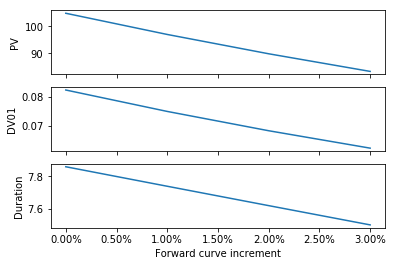

   increment          PV      DV01  Duration
0       0.00  104.825104  0.082376  7.858469
1       0.01   96.965263  0.075037  7.738516
2       0.02   89.802153  0.068423  7.619328
3       0.03   83.267158  0.062458  7.500879


In [5]:
PVs = []
PVs.append(PV)
DV01s = []
Durations = []

for i in range(0,4):
    increment = i*0.01
    newDF = calculateDiscountedFactorCorrespondingToFowardRate(df['forward'][1:10]+increment)
    newPV = calculatePV(cashflow,newDF[1:])
    PVs.append(newPV)
    newDV01 = calculateDV01(newPV, cashflow)
    newDuration = calculateDuration(newPV, cashflow)
    DV01s.append(newDV01)
    Durations.append(newDuration)
increments = [i*0.01 for i in range(0,4)]
f,ax = plt.subplots(3,1,sharex=True)
ax[0].plot(increments,PVs[1:])
# ax[0].set_title('PV-increment')
ax[0].set_ylabel('PV')
ax[1].plot(increments,DV01s)
ax[1].set_ylabel('DV01')
ax[2].plot(increments,Durations)
ax[2].set_ylabel('Duration')
vals = ax[2].get_xticks()
ax[2].set_xticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax[2].set_xlabel('Forward curve increment')
plt.show()

# save the above data
df2 = pd.DataFrame()
df2['increment'] = increments
df2['PV'] = PVs[1:]
df2['DV01'] = DV01s
df2['Duration'] = Durations
print(df2)
df2.to_csv("Output1.csv",mode='w')

### 1.5
The index of the original form is ambiguous, the time stemp is annually or semiannually? As far as I'm concerned, I would assume it was semiannually as coupon are paid semiannually on government bonds. Based on this hypothesis:

In [6]:
discountedFactor18m = df[df.maturity==3].discount.values[0]
forwardPrice = PV/discountedFactor18m
print("forward price 18 months from today: ",forwardPrice)

forward price 18 months from today:  111.896883329


### 1.6
Using the following formula
$$duration =- \frac{1}{P} \frac{\Delta P}{\Delta y}$$

In [7]:
print("duratiohn: ",calculateDuration(PV,cashflow,dy=1e-6))

duratiohn:  7.85846948471


## Problem 2

Consider an eight-month European put option on a Treasury bond that currently has 14.25 years to maturity. The current cash bond price is \$910, the exercise price is $900, and the volatility for the bond price is 10% per annum. A coupon of \$35 will be paid by the bond in three months. The risk-free interest rate is 5\% for all maturities up to one year. Use Black’s model to determine the price of the option. Consider both the case where the strike price corresponds to the cash price of the bond and the case where it corresponds to the quoted price.


The assumption made in the standard market model for valuing European bond
options is that the forward bond price has a volatility $\sigma_B$. This allows Black’s model to be used. Let $F_B$ denotes the forward price of bond, so that

$$p = P(0,T) [KN(-d_2)-F_BN(-d_1)]$$
where
$$d_1 = \frac{ln(F_B/K)+\sigma_B^2T/2}{\sigma_B \sqrt{T}}$$
$$d_2 = d_1 - \sigma_B \sqrt{T}$$
In these equations, K is the strike price of the bond option, T is its time to maturity, and P(0,T) is the (risk-free) discount factor for maturity T.

$F_B$ can be calculated using formula
$$F_B = \frac{B_0-I}{P(0,T)}$$

where $B_0$ is the bond price at time zero and I is the present value of the coupons that
will be paid during the life of the option.

$$I = \$35 \times e^{-r\frac{3}{12}} $$

In [8]:
import math
r = 0.05
T = 8/12
B0 = 910
I = 35 * math.exp(-r*3/12)
discountedFactor = math.exp(-r*T)
forwardPrice = (B0-I)/discountedFactor
print(forwardPrice)

905.1077381222738


### 2.1

Consider the case where the strike price corresponds to cash price
$$K = exercise\ price = \$900$$

In [9]:
from scipy.stats import norm
K = 900
sigma = 0.1
d1_1 = (math.log(forwardPrice/K)+sigma**2*T/2)/sigma/math.sqrt(T)
d2_1 = d1_1 - sigma*math.sqrt(T)
p_1 = discountedFactor * (K*norm.cdf(-d2_1) - forwardPrice*norm.cdf(-d1_1))
print(p_1)

26.0256920546


### 2.2

The strike price corresponds to dirty price
$$K = clean\ price + accrued\ interest$$
where,
$$accrued\ interest = coupon\ payment \times \frac{actual\ number\ of\ days\ since\ last\ payment}{actual\ number\ of\ days\ between\ payment\ dates}$$

In [10]:
accruedInterest = 35*5/6
dirtyStrike = K + accruedInterest
d1_2 = (math.log(forwardPrice/dirtyStrike)+sigma**2*T/2)/sigma/math.sqrt(T)
d2_2 = d1_2 - sigma*math.sqrt(T)
p_2 = discountedFactor * (dirtyStrike*norm.cdf(-d2_2) - forwardPrice*norm.cdf(-d1_2))
print(p_2)

41.9994803229


## Problem 3

Consider the following table with Treasury Yield Rates:

|Time to Maturity | Yield Rate (continuously compounded)|
|-----------------|-------------------------------------|
|3 months|0.14%|
|6 months|0.19%|
|1 year|0.25%|
|2 years|0.51%|
|3 years|0.75%|
|5 years|1.41%|
|7 years|2.02%|
|10 years|2.57%|
|30 years|3.63%|
Use the data provided to build the yield curve using the cubic spline model.

Cubic spline model is of the form
$$S_j(x) = a_j + b_j(x-x_j) + c_j(x-x_j)^2 + d_j(x-x_j)^3$$
$$S_i(x_i) = S_{i-1} (x_i)$$
$$S_i^\prime (x_i) = S_{i-1}^\prime (x_i)$$
$$S_i^{\prime \prime} (x_i) = S_{i-1}^{\prime \prime}(x_i)$$
$$S_i^{\prime \prime} (x_0) = S_{n-1}^{\prime \prime}(x_n) = 0$$

In [11]:
import pandas as pd
import numpy as np

data = {'maturity':[3/12,6/12,1,2,3,5,7,10,30],'yield':np.array([0.14,0.19,0.25,0.51,0.75,1.41,2.02,2.57,3.63])*0.01}
df = pd.DataFrame(data=data)

In [12]:
df

maturity   yield
0      0.25  0.0014
1      0.50  0.0019
2      1.00  0.0025
3      2.00  0.0051
4      3.00  0.0075
5      5.00  0.0141
6      7.00  0.0202
7     10.00  0.0257
8     30.00  0.0363

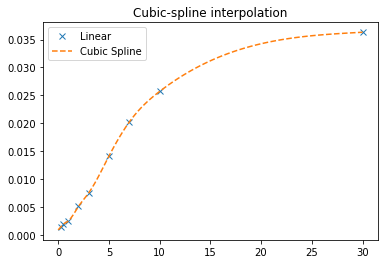

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
x = df['maturity']
y = df['yield']
cs = CubicSpline(x,y,bc_type='natural')
xnew = np.linspace(0, 30, 100)
ynew = cs(xnew)
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, '--')
plt.legend(['Linear', 'Cubic Spline', 'True'])
# plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

Note that here we should be careful about boundary condition. In this case, the second derivative at curve ends are zero, so natural boundary should be necessary. 

## Bonus Problem

Use the functional form of Nelson-Siegel model to estimate the parameters $\beta_0, \beta_1, \beta_2, \tau_1$ for the following Treasury Coupon Bonds:

### Review
Historically, one of the most important drivers of return in fixed-income portfolios has been the yield curve, and many investment strategies are expressed in terms of changes in the curve. Any discussion of fixed-income attribution therefore requires an appreciation of how changes in the curve are described, and their effect on the performance of a portfolio.

Two of the most widely used models are polynomial functions and Nelson-Siegel functions (Nelson and Siegel (1987)). We have considered polynomial functions in problem 3, here, we use Nelson-Siegel model.

$$\hat{y}(m)=\beta_0 + \beta_1(\frac{1-e^{-m/\tau}}{m/\tau})+ \beta_2 (\frac{1-e^{-m/\tau}}{m/\tau}-e^{-m/\tau})$$

In order to obtain the yield curve, we use bonds following formula:

$$P_d = \frac{1}{(1+y(m)/2)^{N_{tc}/182.5}}\times 
    \{C + \frac{C}{(1+y(m)/2)} + \frac{C}{(1+y(m)/2)^2} + \dots 
    + \frac{C}{(1+y(m)/2)^{S-1}} + \frac{F}{(1+y(m)/2)^{S-1}}\} $$
    
where, 

y(m): yield to maturity m.

C: semi-annual coupon payment

$N_{tc}$: number of days between current date t and next coupon payment date c

S: number of coupon payments before redemption (if T is the
number of complete years before redemption, then S=2T if
there is an even number of coupon payments before redemption,
and S=2T+1 if there is an odd number of coupon
payments before redemption).

F: par value of bond

$P_d$: dirty price of bond

### Optimization Problem

Define loss function:

$$loss(\beta_0, \beta_1, \beta_2, \tau_1) = \Sigma_{i=1}^n w_i(y(m_i)-\hat{y}(m_i))^2$$

$$\min loss(\beta_0, \beta_1, \beta_2, \tau_1)$$
constraints:

$$\beta_0 \in (0,1)$$
$$\beta_1 + \beta_0 > 0$$
$$\beta_1 \in (-1,1)$$
$$\beta_2 \in (-1,1)$$
$$\tau > 0$$

Note that this optimization problem is slightly different from the one in the lecture. Firstly, the yields are calculated by the definition of yield to maturity of bond. Secondly, the object function is different, for this one is more consistent with the original Nielson-Siegel's article.

In [14]:
df3 = pd.read_excel('BonusInput.xlsx')
print(df3)

    time to next payment  payment frequency  time to maturity  coupon rate  \
0                 0.4356                  2            0.4356      0.00875   
1                 0.2644                  2            0.7644      0.00875   
2                 0.2658                  2            1.2658      0.00750   
3                 0.4342                  2            1.9342      0.00625   
4                 0.0192                  2            2.0192      0.00375   
5                 0.4753                  2            2.9753      0.00750   
6                 0.3534                  2            3.3534      0.01500   
7                 0.1000                  2            3.6000      0.01750   
8                 0.2685                  2            4.2685      0.02125   
9                 0.4342                  2            4.9342      0.01750   
10                0.2274                  2            5.2274      0.04500   
11                0.1027                  2            5.6027   

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.00018562609495
            Iterations: 36
            Function evaluations: 217
            Gradient evaluations: 36
[ 0.03766032 -0.02070425 -0.11191637  3.02268534]


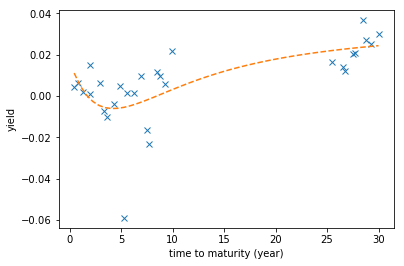

In [15]:
import pandas as pd
import numpy as np
import math
import scipy.optimize

def calculateAccruedInterest(coupon,daysToNextPayment,daysBetweenPayments):
    return coupon * (180-daysToNextPayment)/daysBetweenPayments

def calculateDirtyPrice(cleanPrice, accruedInterest):
    return cleanPrice - accruedInterest

# We assume we follow the 360-day year convention
def calculateDirtyPriceFromYield(couponRate, parValue, Ntc, YTM, numPayments):
    semiAnnualCoupon = couponRate * parValue/2
    dirtyPrice = 1/(1+YTM/2)**(Ntc/180) \
                 * (semiAnnualCoupon*2/YTM * (1+YTM/2 - (1 + YTM/2)**(1-numPayments))\
                 + parValue/(1+YTM/2)**(numPayments-1))
    return dirtyPrice

def solveYield(dirtyPrice, couponRate, parValue, Ntc, numPayments):
    fun = lambda y: calculateDirtyPriceFromYield(couponRate,parValue,Ntc,y,numPayments)-dirtyPrice
    YTM = scipy.optimize.brenth(fun,-0.5,0.5)
    return YTM

def NielsonSiegelFunction(b0,b1,b2,tau,m):
    y = b0 + b1*(1-np.exp(-m/tau))/(m/tau)+b2*((1-np.exp(-m/tau))/(m/tau)-np.exp(-m/tau))
    return y

def calculateTotalLoss(maturities, YTMs, weights, b0,b1,b2,tau):
    n = len(maturities)
    y = np.asarray(YTMs)
    yHat = np.asarray([NielsonSiegelFunction(b0,b1,b2,tau,m) for m in maturities])
    totalLoss = np.dot(weights, np.square(y - yHat))/n
    return totalLoss


def solveNielsonSiegel(maturities,YTMs,weights,disp=True):
    objectFunction = lambda x: calculateTotalLoss(maturities,YTMs,weights,x[0],x[1],x[2],x[3])
    constraints=({'type':'ineq',
                 'fun': lambda x: x[0]},
                 {'type':'ineq',
                  'fun': lambda x: x[1]+x[0]},
                 {'type': 'ineq',
                  'fun': lambda x: x[2] +1},
                 {'type':'ineq',
                  'fun': lambda x: x[3]},
                 {'type': 'ineq',
                  'fun': lambda x: 1 - x[0]},
                 {'type': 'ineq',
                  'fun': lambda x: 1 - x[1]},
                 {'type': 'ineq',
                  'fun': lambda x: 1 - x[2]},
                 )
    res = scipy.optimize.minimize(objectFunction,[0.01,-0.01,0.01,0.5],
                                  constraints=constraints,tol=1e-12,options={'disp':disp})
    # print(res)
    return res.x

def plotYield(maturites,NSParameters,YTMs=None):
    import matplotlib.pyplot as plt
    m = np.linspace(np.min(maturities),np.max(maturities),50)
    y = NielsonSiegelFunction(NSParameters[0],NSParameters[1],NSParameters[2],NSParameters[3],m)
    if(YTMs==None):
        plt.plot( m, y, '--')
    else:
        plt.plot(maturities, YTMs, 'x',m, y, '--')

    plt.xlabel("time to maturity (year)")
    plt.ylabel("yield")
    plt.show()
    return



df3 = pd.read_excel('BonusInput.xlsx')
# assume par value is 100
parValue = 100
YTMs = []
maturities = []
for i in range(len(df3)):
    cleanPrice = df3.ix[i]['clean price']
    daysToNextPayment = df3.ix[i]['time to next payment'] * 360
    # daysFromLastPayment = 180 - daysToNextPayment
    timeToMaturity = df3.ix[i]['time to maturity']
    numPayments = math.ceil(timeToMaturity/2)
    couponRate = df3.ix[i]['coupon rate']
    accruedInterest = calculateAccruedInterest(couponRate*parValue/2,daysToNextPayment,180)
    dirtyPrice = calculateDirtyPrice(cleanPrice,accruedInterest)
    YTM = solveYield(dirtyPrice,couponRate,parValue,daysToNextPayment,numPayments)
    YTMs.append(YTM)
    maturities.append(timeToMaturity)

# print(YTMs)
df3['yield to maturity'] = YTMs
weights1 = 1/np.array(maturities)
weights2 = [1 for i in range(len(maturities))]
res = solveNielsonSiegel(maturities=maturities,YTMs=YTMs,weights=weights2)
print(res)
plotYield(maturities,res,YTMs)


In [16]:
print(df3)

    time to next payment  payment frequency  time to maturity  coupon rate  \
0                 0.4356                  2            0.4356      0.00875   
1                 0.2644                  2            0.7644      0.00875   
2                 0.2658                  2            1.2658      0.00750   
3                 0.4342                  2            1.9342      0.00625   
4                 0.0192                  2            2.0192      0.00375   
5                 0.4753                  2            2.9753      0.00750   
6                 0.3534                  2            3.3534      0.01500   
7                 0.1000                  2            3.6000      0.01750   
8                 0.2685                  2            4.2685      0.02125   
9                 0.4342                  2            4.9342      0.01750   
10                0.2274                  2            5.2274      0.04500   
11                0.1027                  2            5.6027   

### Interpolate exponential zero rate

Using exponential zero rate $R(0,m)$ denotes the exponential zero rate to maturity m.
And interpolate the exponential zero rate curve using Nelson-Siegel functions.
$$\hat{R}(0,m)=\beta_0 + \beta_1(\frac{1-e^{-m/\tau}}{m/\tau})+ \beta_2 (\frac{1-e^{-m/\tau}}{m/\tau}-e^{-m/\tau})$$

$$\hat{B}(0,m) = \Sigma_{j=1}^S C e^{R(0,\tau_j)\tau_j} + F e^{-R(0,m)m}$$

where,

C: semi-annual coupon payment

R(0,$\tau$): exponential zero rate from time 0 to time $\tau$

F: par value of the coupon

and object function is defined:

$$\Sigma_{i=1}^n w_i[ \hat{B}(0,m_i)-B(0,m_i)]^2$$

where $w_i$ is the weight for each payment date

constraints:

$$\beta_0 \in (0,1)$$
$$\beta_1 + \beta_0 > 0$$
$$\beta_1 \in (-1,1)$$
$$\beta_2 \in (-1,1)$$
$$\tau > 0$$

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.666657444544
            Iterations: 40
            Function evaluations: 256
            Gradient evaluations: 40
[ 0.04529258 -0.03917825 -0.05727784  1.97914684]


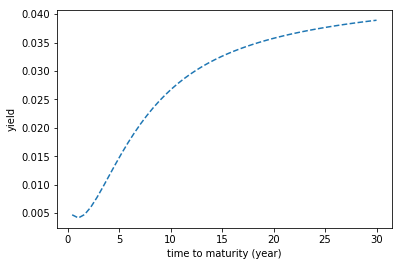

In [17]:
# another explanation
def calculateBondPriceByExponentialRate(coupon, parValue, paymentTimes, b0,b1,b2,tau):
    maturity = np.max(paymentTimes)
    PV_coupon = 0
    for m in paymentTimes:
        R = NielsonSiegelFunction(b0,b1,b2,tau,m)
        # print(R)
        PV_coupon += coupon * np.exp(-R*m)
    Rm = NielsonSiegelFunction(b0,b1,b2,tau,maturity)
    bondPrice = PV_coupon + parValue*np.exp(-Rm*maturity)
    return bondPrice

def calculateTotalLoss2(df3,b0,b1,b2,tau):
    totalLoss = 0
    for i in range(len(df3)):
        cleanPrice = df3.ix[i]['clean price']
        timeToNextPayment = df3.ix[i]['time to next payment']
        timeToMaturity = df3.ix[i]['time to maturity']
        paymentTimes = np.arange(timeToNextPayment,timeToMaturity+1e-6,0.5)
        weight = 1/timeToMaturity
        couponRate = df3.ix[i]['coupon rate']
        coupon = parValue*couponRate/2
        accruedInterest = calculateAccruedInterest(couponRate * parValue / 2, daysToNextPayment, 180)
        dirtyPrice = calculateDirtyPrice(cleanPrice, accruedInterest)
        # maturities.append(timeToMaturity)
        priceHat = calculateBondPriceByExponentialRate(coupon,parValue,paymentTimes,b0,b1,b2,tau)
        # print(priceHat)
        if(priceHat==np.inf):
            print(b0,b1,b2,tau)
        totalLoss += weight * np.square(priceHat-dirtyPrice)
    return totalLoss

def solveNielsonSiegel2(df3,disp=True):
    objectFunction = lambda x: calculateTotalLoss2(df3,x[0],x[1],x[2],x[3])
    constraints=({'type':'ineq',
                 'fun': lambda x: x[0]},
                 {'type':'ineq',
                  'fun': lambda x: x[1]+x[0]},
                 {'type': 'ineq',
                  'fun': lambda x: x[2] +1},
                 {'type':'ineq',
                  'fun': lambda x: x[3]},
                 {'type': 'ineq',
                  'fun': lambda x: 1 - x[0]},
                 {'type': 'ineq',
                  'fun': lambda x: 1 - x[1]},
                 {'type': 'ineq',
                  'fun': lambda x: 1 - x[2]},
                 )
    res = scipy.optimize.minimize(objectFunction,[0.1,0.1,0.1,2],
                                  constraints=constraints,tol=1e-12,
                                  options={'disp':disp})
    # print(res)
    return res.x
NSParameters = solveNielsonSiegel2(df3)
print(NSParameters)
plotYield(df3['time to maturity'],NSParameters)

### Summary
This one should be a more suitable yield curve compare to the first one, now I convinced myself to use the latter strategy to parameterize yield curve.

Result:

$$\beta_0 = 4.529%$$
$$\beta_1 = -3.918%$$
$$\beta_2 = -5.728%$$
$$\tau = 1.979$$